In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjust the configuration of the plots we will create

In [77]:
# Read in the data
df = pd.read_csv('D:\DataProject\movies.csv')
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7378,Unsane,R,Drama,2018,"March 23, 2018 (United States)",6.4,42000.0,Steven Soderbergh,Jonathan Bernstein,Claire Foy,United States,1500000.0,14293601.0,Fingerprint Releasing,98.0
5618,Dead Snow,Not Rated,Comedy,2009,"January 9, 2009 (Norway)",6.3,65000.0,Tommy Wirkola,Tommy Wirkola,Jeppe Beck Laursen,Norway,800000.0,2166797.0,Euforia Film,91.0
1977,Edward II,R,Drama,1991,"October 18, 1991 (United Kingdom)",6.8,2500.0,Derek Jarman,Christopher Marlowe,Steven Waddington,United Kingdom,NaN,706131.0,British Screen Productions,87.0
557,Rhinestone,PG,Comedy,1984,"June 22, 1984 (United States)",3.9,7000.0,Bob Clark,Phil Alden Robinson,Sylvester Stallone,United States,28000000.0,21435321.0,Twentieth Century Fox,111.0
1027,Touch and Go,R,Comedy,1986,"August 22, 1986 (United States)",5.7,818.0,Robert Mandel,Alan Ormsby,Michael Keaton,United States,NaN,1254040.0,Kings Road Entertainment,101.0


## Data Cleaning

In [78]:
# Checking null value in percentage

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 1.0041731872717787%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.22170057381324987%
runtime - 0.05216484089723526%


In [79]:
# Clearing null value by delete all null value

df.dropna(inplace=True)

In [80]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [81]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
# Change data type for votes, budget and gross for better view

df[['votes', 'budget', 'gross']] = df[['votes', 'budget', 'gross']].astype('int64')

In [83]:
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2330,Airborne,PG,Adventure,1993,"September 17, 1993 (United States)",6.3,6500,Rob Bowman,Bill Apablasa,Shane McDermott,United States,2600000,2850263,Icon Entertainment International,91.0
5087,Ocean's Thirteen,PG-13,Crime,2007,"June 8, 2007 (United States)",6.9,328000,Steven Soderbergh,Brian Koppelman,George Clooney,United States,85000000,311312624,Warner Bros.,122.0
1501,A Nightmare on Elm Street 5: The Dream Child,R,Fantasy,1989,"August 11, 1989 (United States)",5.1,42000,Stephen Hopkins,Wes Craven,Robert Englund,United States,6000000,22168359,New Line Cinema,89.0
5193,Redacted,R,Crime,2007,"November 16, 2007 (Spain)",6.1,10000,Brian De Palma,Brian De Palma,Patrick Carroll,United States,5000000,784604,HDNet Films,90.0
6299,Coherence,Not Rated,Drama,2013,"August 6, 2014 (United States)",7.2,115000,James Ward Byrkit,James Ward Byrkit,Emily Baldoni,United States,50000,139745,Bellanova Films,89.0
4781,"Good Night, and Good Luck.",PG,Biography,2005,"November 4, 2005 (United States)",7.4,95000,George Clooney,George Clooney,David Strathairn,United States,7000000,54641191,Warner Independent Pictures (WIP),93.0
37,Motel Hell,R,Comedy,1980,"October 24, 1980 (United States)",6.0,11000,Kevin Connor,Robert Jaffe,Rory Calhoun,United States,3000000,6342668,Camp Hill,101.0
2380,Indian Summer,PG-13,Comedy,1993,"April 23, 1993 (United States)",6.6,5300,Mike Binder,Mike Binder,Alan Arkin,Canada,9000000,14904910,Outlaw Productions (I),97.0
5604,Observe and Report,R,Comedy,2009,"April 10, 2009 (United States)",5.8,61000,Jody Hill,Jody Hill,Seth Rogen,United States,18000000,26973554,De Line Pictures,86.0
4437,Good Boy,PG,Comedy,2003,"October 10, 2003 (United States)",5.1,4100,John Hoffman,Zeke Richardson,Liam Aiken,United States,18000000,45490616,Metro-Goldwyn-Mayer (MGM),87.0


In [84]:
# Some year and release year are not the same

df['year_released'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [85]:
(df['year'] != df['year_released']).sum()

# There are 708 row that year aren't the same as year in released

708

In [11]:
# pd.set_option('display.max_row', None)

In [86]:
df.sort_values('gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [87]:
# Drop duplicate row

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


there is no duplicate row

## Finding Correlations in data

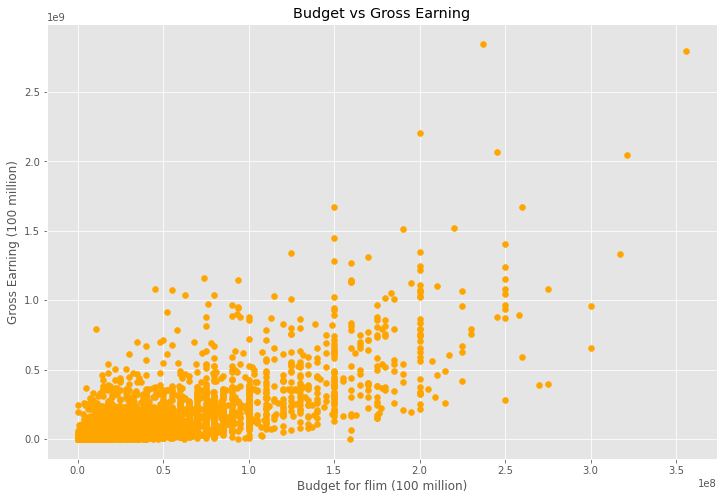

In [21]:
# Lets look at correlation between budget and gross
# Create Scatter plot

plt.scatter(x=df.budget, y=df.gross, color='orange')
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget for flim (100 million)')
plt.ylabel('Gross Earning (100 million)')
plt.show()

In [24]:
df[['gross', 'budget']].sort_values(['gross', 'budget'], ascending=False).head()

,gross,budget
5445,2847246203,237000000
7445,2797501328,356000000
3045,2201647264,200000000
6663,2069521700,245000000
7244,2048359754,321000000


<AxesSubplot:xlabel='budget', ylabel='gross'>

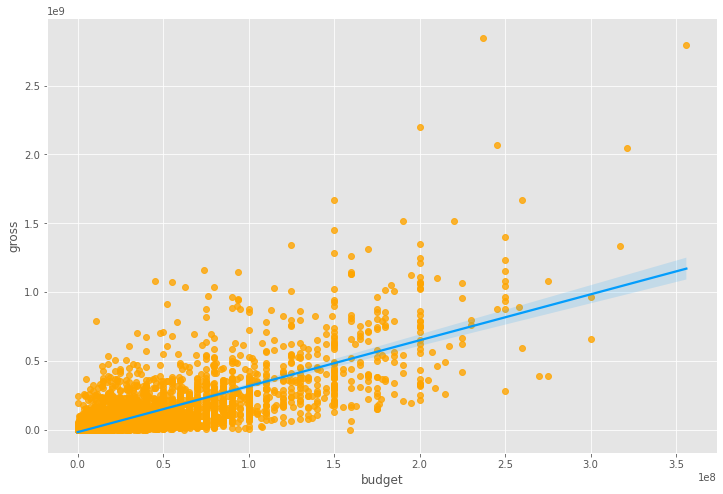

In [31]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'orange'}, line_kws={'color':'#039dfc'})

In [35]:
# Lets look at correlation of all table
df.corr()

,score,votes,budget,gross,runtime,year_released
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_released,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


It's only show columns that have numeric types

In [88]:
# drop columns year
df.drop('year', axis=1, inplace=True)

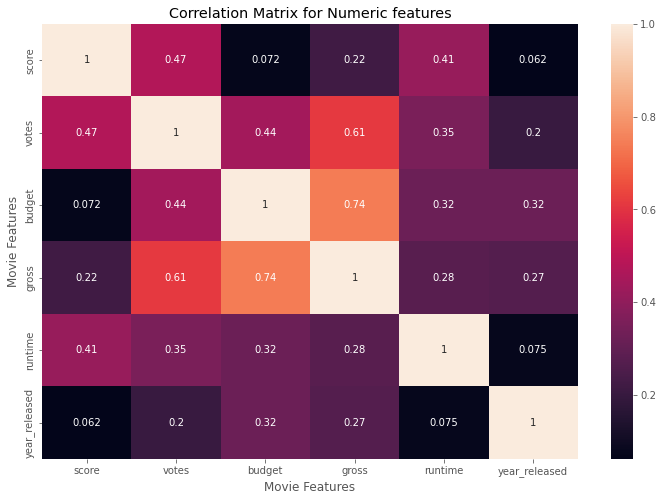

In [36]:
# Create heatmap

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [49]:
df.dtypes

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020


In [44]:
# Look at object type columns

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [45]:
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020


In [89]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


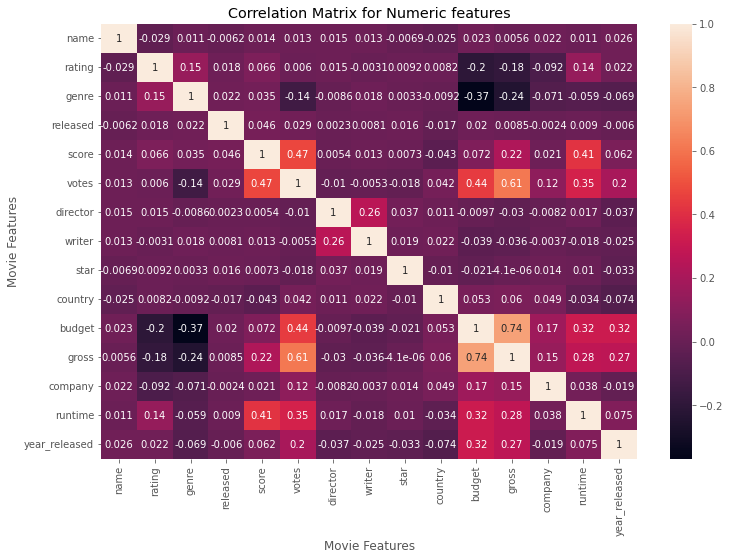

In [91]:
# Create second heatmap

correlation_matrix_num = df_numerized.corr()
sns.heatmap(correlation_matrix_num, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Looks like budget and votes correlate to gross earning most

In [103]:
corr_pair = correlation_matrix_num.unstack()
high_corr = corr_pair[corr_pair != 1].sort_values(ascending=False).head(10)
high_corr

gross    budget     0.740247
budget   gross      0.740247
votes    gross      0.614751
gross    votes      0.614751
score    votes      0.474256
votes    score      0.474256
         budget     0.439675
budget   votes      0.439675
score    runtime    0.414068
runtime  score      0.414068
dtype: float64

(Gross & budget), (Votes & Gross), (Score & Votes), (Votes & Budget) have the highest correlation respectively